In [1]:
%matplotlib inline

import networkx as nx
import json
import io
import re
import urllib2
import codecs
import operator
import matplotlib
import matplotlib.pyplot as plt
import unicodedata
import urllib
import numpy as np
import math
from urllib2 import quote
from urllib2 import unquote
from __future__ import division
from sets import Set

C:\Users\Jon Buch\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: the sets module is deprecated


In [2]:
aerospace_string = io.open('branchTexts/aerospaceText.txt', 'r', encoding='utf-8')
aerospace_string = aerospace_string.read().lower()   
aerospace_list = re.findall(r'\[\[(.*?)\]\]', aerospace_string)
# aerospace_set = set(aerospace_list)
# aerospace_list = aerospace_set

# write list into files
scienceTypes = [aerospace_list]
scienceTypesNames = ["aerospace_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()

In [3]:
mechanics_string = io.open('branchTexts/mechanicsText.txt', 'r', encoding='utf-8')
mechanics_string = mechanics_string.read().lower()   
mechanics_list = re.findall(r'\[\[(.*?)\]\]', mechanics_string)
# mechanics_set = set(mechanics_list)
# mechanics_list = mechanics_set

scienceTypes = [mechanics_list]
scienceTypesNames = ["mechanics_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()

In [4]:
robotics_string = io.open('branchTexts/roboticsText.txt', 'r', encoding='utf-8')
robotics_string = robotics_string.read().lower() 
robotics_list = re.findall(r'\[\[(.*?)\]\]', robotics_string)
robotics_set = set(robotics_list)
robotics_list = robotics_set

scienceTypes = [robotics_list]
scienceTypesNames = ["robotics_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()

In [5]:
import re
from urllib import urlopen

url = "http://www.math.utah.edu/~wisnia/glossary.html"
html = urlopen(url).read()
html = html.lower()   
computer_science_list = re.findall ( '<h3>(.*?)</h3>', html, re.DOTALL)
# computer_science_set = set(computer_science_list)
# computer_science_list = computer_science_set


scienceTypes = [computer_science_list]
scienceTypesNames = ["computer_science_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()


In [6]:
url = "http://www.youngco.com/young2.asp?ID=4&Type=3"
html = urlopen(url).read()
html = html.lower()   
electrical_list = re.findall ( '<font class="term"><b>(.*?)</b></font>', html, re.DOTALL)
# electrical_set = set(electrical_list)
# electrical_list = electrical_set



scienceTypes = [electrical_list]
scienceTypesNames = ["electrical_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        try:
            f.write("%s\n" % item)
        except Exception, e:
            continue

    f.close()


#<font class="term"><b>AMF (Lighting)</b></font>

In [7]:
electronic_list = []
for letter  in "abcdefghijklmnopqrstuvwxyz":
    temp_list = []
    url = "http://www.hobbyprojects.com/dictionary/"+letter + ".html"
    #print url
    html = urlopen(url).read()
    html = html.lower()   
    temp_list = re.findall ( '<p><b>(.*?)</b>', html, re.DOTALL)
    electronic_list = electronic_list + temp_list

# electronic_set = set(electronic_list)
# electronic_list = electronic_set
scienceTypes = [electronic_list]
scienceTypesNames = ["electronic_list"]

for i in range(1):
    f = codecs.open('branchTexts/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        try:
            f.write("%s\n" % item)
        except Exception, e:
            continue

    f.close()


#<font class="term"><b>AMF (Lighting)</b></font>
#<p><b>absorption</b>

--------------------------------CREATE NETWORK--------------------------

In [8]:
# read list of philosophers from each of branch and from all philo
electronic_list = []
electrical_list = []
computer_science_list = []
robotics_list = []
mechanics_list = []
aerospace_list = []
all_terms_list = {}

scienceTypes = [electronic_list, electrical_list, computer_science_list, robotics_list, mechanics_list, aerospace_list]
scienceTypesNames = ["electronic_list", "electrical_list", "computer_science_list", "robotics_list", "mechanics_list", "aerospace_list"]

for i in range(6):
    f = io.open('branchListsFromHTML/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    
    
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)
        
all_terms_list = electronic_list + electrical_list + computer_science_list + robotics_list + mechanics_list + aerospace_list

In [9]:
print len(electronic_list)
print len(electrical_list)
print len(computer_science_list)
print len(robotics_list)
print len(mechanics_list)
print len(aerospace_list)
print len(all_terms_list)

749
1095
422
102
340
312
3020


In [10]:
electronic_list = set(electronic_list)
electrical_list = set(electrical_list)
computer_science_list= set(computer_science_list)
robotics_list= set(robotics_list)
mechanics_list= set(mechanics_list)
aerospace_list= set(aerospace_list)
all_terms_list= set(all_terms_list)

In [11]:
print len(electronic_list)
print len(electrical_list)
print len(computer_science_list)
print len(robotics_list)
print len(mechanics_list)
print len(aerospace_list)
print len(all_terms_list)

748
1093
421
91
335
310
2839


In [12]:
all_terms_list = list(all_terms_list)
all_terms_list.sort()
print all_terms_list

[u'3 phase', u'600v-ud', u'802.11a', u'802.11b', u'802.11g', u'802.1x', u'a-h', u'a/d conversion', u'aa', u'aaac', u'aac', u'aac/tw', u'aashto', u'ablative laser propulsion', u'absolute value', u'absorbed glass mat', u'absorption', u'ac', u'ac coupling', u'ac generator', u'ac load line', u'ac power supply', u'ac voltage', u'ac/dc', u'acar', u'acb', u'accelerated life testing', u'acceleration', u'accelerometer', u'acceptor atoms', u'access', u'access control list', u'access point', u'access time', u'account', u'account name', u'accuracy', u'accuracy and precision', u'accuracy class', u'ackermann steering geometry', u'acoustic droplet ejection', u'acsr', u'acsr/aw', u'acsr/tw', u'acss', u'acss/aw', u'acss/tw', u'action (physics)', u'active component', u'active filter', u'active material (battery)', u'active power', u'active region', u'actual mechanical advantage', u'actuator', u'adc', u'address', u'adjustment', u'admittance', u'adsl', u'advanced space vision system', u'aeic', u'aeolian v

In [13]:
f = codecs.open('branchListsFromHTML/'+"all_terms_list"+'.txt', 'w', encoding = 'utf-8')
for item in all_terms_list:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue

f.close()

In [14]:
removeEmptyPage = []

In [15]:
# #https://en.wikipedia.org/w/api.php?action=query&titles=Spider-Man&prop=revisions&rvprop=content&format=json
# baseurl = "https://en.wikipedia.org/w/api.php?"
# action = "action=query"
# title = "titles="
# content = "prop=revisions&rvprop=content"
# dataformat = "format=json"



# for term in all_terms_list[:1000]:
#     s = list(term)
#     for i in range(len(s)):
#         if(s[i] == ' '):
#             s[i] = '_'
    
#     termNameAdjusted = "".join(s)
#     termNameAdjusted = urllib.quote(termNameAdjusted.encode("utf8"))

#     query = "%s%s&%s%s&%s&%s" % (baseurl,action,title,termNameAdjusted,content,dataformat)
    
#     print query

#     query.encode('utf-8')
#     wikiResponse = urllib2.urlopen(query)
#     wikiSource = wikiResponse.read()
    
#     #check whether there is sth in the page
   
#     wikiJson = json.loads(wikiSource)
#     pageEmpty = wikiJson["query"]["pages"].keys()[0]
#     print pageEmpty
    
    
#     if pageEmpty == '-1':
#         removeEmptyPage.append(term) 
#         continue
#     else:
#         encoding = wikiResponse.headers['content-type'].split('charset=')[-1]
#         ucontent = unicode(wikiSource, encoding)

#         try:
#             f = io.open('terms_two/'+term, 'w', encoding = 'utf-8')
#             f.write(ucontent)
#             f.close()
#         except Exception, e:
#             removeEmptyPage.append(term)
#             print "Oops! Something went wrong"
#             continue



In [16]:
# read list of philosophers from each of branch and from all philo
electronic_list = []
electrical_list = []
computer_science_list = []
robotics_list = []
mechanics_list = []
aerospace_list = []
all_terms_list = []

scienceTypes = [electronic_list, electrical_list, computer_science_list, robotics_list, mechanics_list, aerospace_list]
scienceTypesNames = ["electronic_list", "electrical_list", "computer_science_list", "robotics_list", "mechanics_list", "aerospace_list"]

for i in range(6):
    f = io.open('branchListsFromHTML/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    
    
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)
        
all_terms_list = electronic_list + electrical_list + computer_science_list + robotics_list + mechanics_list + aerospace_list

In [17]:
print len(all_terms_list)

3020


In [18]:
removeEmptyPageRead = [u'tcp/ip',u'i/o',u'voltage rating',u'stranded conductor', u'induced voltage', u'600v-ud', u'a-h', u'a/d conversion', u'aaac', u'aac/tw', u'aashto', u'ac coupling', u'ac generator', u'ac load line', u'ac power supply', u'ac voltage', u'ac/dc', u'acceptor atoms', u'account name', u'acsr', u'acsr/aw', u'acsr/tw', u'acss/aw', u'acss/tw', u'active material (battery)', u'advanced space vision system', u'aeic', u'afci', u'air blast breakers', u'alj', u'all-or-nothing relay', u'alley arm', u'alley roadway (lighting)', u'allowance (engineering)|allowance', u"american machinists' handbook", u'american wire gage (awg)', u'amf (lighting)', u'ampere-hour capacity (storage battery)', u'ampere-hour meter', u'antenna, receiving', u'antenna, transmitting', u'anti-pumping device', u'apparent power (volt-amps)', u'arc thermal performance value', u'arcing time', u'armor rod', u'arp4761', u'askeral', u'astm', u'atm forum', u'automatic line sectionalizer', u'automatic recloser', u'autonomous photovoltaic system', u'auxiliary relay', u'average maintained foot-candles (lighting)', u'background processing', u'backlash (gear)|backlash', u'baker board', u'balanced load', u'balanced polyphase system', u'barrier potential', u'base biasing', u'basic impulse level (bil)', u'basic insulation level', u'batch query', u'battery tray', u'bay-o-net', u'bearing (mechanical)|bearing', u'belt (mechanical) |belt', u'biased relay', u'bikeway (lighting)', u'bitmapped terminal', u'bits per second (bps)', u'bleeder current', u'body in white|biw', u'bogie|truck (railway)', u'booster transformer', u'branch current', u'break over voltage', u'breakthrough propulsion physics program', u'building wire', u'bulb envelope lighting)', u'bulk resistance', u'bull line', u'bull wheel', u'bulletin board (bbs)', u'bunched stranding', u'buried urban residential distribution', u'bushing (isolator)|bushing', u'bushing well', u'c-rate', u'c2h6', u'cable cleaner', u'cable pulling lubricant', u'cable sheath', u'cal-iso', u'california independent system operator (cal-iso)', u'california power exchange (calpx)', u'california public utilities commission (cpuc)', u'camp fallujah', u'candela (cd)', u'candlepower distribution curve', u'capacitor microphone', u'capacity (battery)', u'carbon resistor', u'carbon-film resistor', u'carriage return <cr>', u'cascaded amplifier', u'cell (battery)', u'cell (photovoltaic)', u'cell voltage (battery)', u'cell-reversal (battery)', u'center tapped rectifier', u'center tapped transformer', u'ch2h2', u'chandra x-ray observatory', u'characteristic angle', u'characteristic impedance ratio (c.i.r.)', u'charge (battery)', u'charge current', u'charge rate (battery)', u'charge-retention (battery)', u'check protection system', u'circuit insulation voltage', u'circuit switchers', u'circuit voltage', u'circular-mil (cmil)', u'class a amplifier', u'class b amplifier', u'class c amplifier', u'class index', u'clearing time', u'clf', u'client-server interface', u'client/server', u'closed-loop gain', u'closing impulse time', u'cnc|computer-numerically controlled', u'coefficient of utilization (cu)', u'coffin hoist', u'coil loss', u'collector characteristic curve', u'collector roadway (lighting)', u'combination unilay', u'commercial (lighting)', u'common cathode display', u'common-anode display', u'common-mode signals', u'communications line', u'communications program', u'compact stranding', u'competition transition charge (ctc)', u'complementary symmetry amplifier', u'complementary transistors', u'compliance voltage', u'compression splice', u'computer-aided design|cad', u'computer-aided industrial design|caid', u'computer-aided manufacturing|cam', u'concentrator (photovoltaic)', u'concentric stranding', u'conductor loss', u'conductor shield', u'conduit fill', u'conjunctive test', u'connect time', u'constant current charge', u'constant current circuit', u'constant potential charge', u'constraint algorithm (mechanics)|constraint', u'continuous load', u'continuous rating', u'conversion coefficient', u'core balance current transformer', u'counter electromotive force', u'counting relay', u'cpe', u'cpuc', u'crest value', u'cross-linked polyethylene (xlpe)', u'crystal-controlled oscillator', u'cu (lighting)', u'current feedback', u'current limiting fuse', u'current transformer ratio', u'current-limiting resistor', u'cursor control', u'cut off voltage', u'cutoff (lighting)', u'cutoff angle (lighting)', u'cutoff, full (lighting)', u'cutoff, non (lighting)', u'cutoff, semi (lighting)', u'cycle (battery)', u'da bolt', u'day ahead market', u'dc load line', u'dc power supply', u'dcf77', u'de-energized', u'de-ionization time', u'dead front', u'dead short', u'deep discharge (battery)', u'degenerative feedback', u'delay time', u'delta-wye', u'dependent time measuring relay', u'depletion-mode mosfet', u'design test', u'device control point', u'dictionary file', u'dielectric test', u'dielectric withstand', u'dielectric withstand voltage test', u'differential (mechanics)|differential', u'digital datcom', u'dip tolerance (lighting)', u'direct-on-line', u'directional relay', u'discharge (battery)', u'discharge current', u'discharge rate (battery)', u'disk or diskette', u'distortion factor', u'distributed capacitance', u'distributed inductance', u'distribution automation', u'distribution system', u'distribution voltage', u'disturbed network protocol', u'do-178b', u'do-254', u'domain host control protocol', u'donor atoms', u'double arming bolt', u'draw-lead', u'drifting (motorsport)|drifting', u'dropping resistor', u'dry charge (battery)', u'dry-type transformers', u'dsss', u'dtim', u'dual trace oscilloscope', u'dual voltage switch', u'dual voltage transformer', u'duct bank', u'dynamics (mechanics)|dynamics', u'earth fault protection system', u'earthing transformer', u'eei', u'eera', u'effective internal resistance (battery)', u'effective power (watts)', u'effective range', u'effective setting', u'effectively grounded', u'efficiency (lighting)', u'ehv', u'elasticity (physics)|elasticity', u'electrical hazard', u'electrically safe work condition', u'electro acoustic transducer', u'electrolyte (battery)', u'electromagnetic communication', u'electromechanical transducer', u'electron flow', u'emitter feedback', u'end point voltage', u'end-of-discharge voltage', u'end-point voltage', u'enhancement-mode mosfet', u'entrainment (battery)', u'epdm', u'epr', u'equivalent resistance', u'exciting current', u'explosive ordnance disposal robot', u'expressway roadway (lighting)', u'extension, box', u'factor of safety|margin of safety', u'fatigue (material)|fatigue', u'fault close rating', u'federal energy regulatory commission (ferc)', u'ferc', u'ferrite-core inductor', u'ferro resonance', u'fiducial value', u'field current', u'fillet (mechanics)|fillet', u'fixed capacitor bank', u'flame resistance', u'flash hazard', u'flash hazard analysis', u'flash protection boundary', u'flash suit', u'float charge', u'float charge (battery)mti', u'flooded cell', u'foot-candle (fc)', u'fpi', u'free running multivibrator', u'frequency response curve', u'frequency transducer', u'frequency-domain analysis', u'friction|resistive force', u'full duplex communications', u'full scale output', u'fundamentals of engineering examination', u'fuse arcing time', u'fuse link', u'fuse melt time', u'fused cutout', u'future air navigation system', u'gain bandwidth product', u'ganged', u'gauge (engineering) |gauge', u'gel cleaner', u'generator step-up (gsu)', u'glossary of chemistry terms|glossary of chemistry', u'graduate aptitude test in engineering', u'grip all stick', u'ground fault', u'gto', u'guy strain insulator', u'h20-44', u'half wave rectifier', u'half-duplex communications', u'hard drawn', u'hazard risk category', u'heat run test', u'hierarchical file', u'hierarchical file structure', u'high intensity discharge (hid) lamp', u'high pot', u'high pressure sodium (hps) lamp', u'high voltage system', u'high-speed reclosing', u'hookstick', u'horizontally polarized wave', u'hot arm', u'hrc', u'hs20-44', u'hs285 (tm)', u'hsr', u'hvac|heating and cooling systems', u'hybrid photovoltaic system', u'hyshot', u'i.d.m.t.', u'i/o', u'i2t', u'ic voltage regulator', u'icea', u'ict', u'iec', u'iesna', u'igbt', u'ill (lighting)', u'impedance coupling', u'imperial college london', u'impulse test', u'incident energy', u'incidental light traffic', u'independent time measuring relay', u'induced voltage', u'inductive circuit', u'influence quantity', u'initial lamp lumens (lighting)', u'input quantity', u'insect robot', u'instantaneous relay', u'institution of mechanical engineers', u'insulating material', u'insulation resistance', u'intensity (lighting)', u'intermediate (lighting)', u'intermediate class arrester', u'intermediate frequency amplifier', u'internal impedance (battery)', u'internal resistance (battery)', u'international system of units (si)', u'interrupter switch', u'interrupting medium', u'interruption duration', u'interruption, momentary', u'interruption, sustained', u'intrinsic error', u'intrinsic material', u'intrinsic stand-off ratio', u'inverse time delay relay', u'inverting input', u'investor owned utility (iou)', u'irig-b', u'ism band', u'isolation link', u'johnny ball', u'junction, 200 amp', u'junction, 600 amp', u'k-bus (courier)', u'kilobyte(k)', u'kirchhoff&quot;s current law', u'kirchhoff&quot;s voltage law', u'knee voltage', u'knee-point e.m.f.', u'kutta\u2013joukowski theorem', u'kyz', u'ladder diagram (ld)', u'lamp lumen depreciation, lld (lighting)', u'lan e-mail system', u'lateral circuit', u'lateral light distribution', u'lay direction', u'lay length', u'ldc', u'lead acid (battery)', u'lead dioxide (battery)', u'left-hand-rule', u'legal liability|liability', u'level detector', u'life cycle assessment|life cycle cost analysis', u'light loss factor (llf)', u'light traffic', u'lighting arrester', u'lighting maintenance factor (mf)', u'lightning & switching impulses', u'limited approach boundary', u'limiting value of the output current', u'line hose', u'line traps', u'linkage (mechanical)|linkage', u'llf (lighting)', u'load break', u'load current', u'local control mode', u'local roadway (lighting)', u'logical record', u'login id', u'login or logon', u'long distribution (lighting)', u'lpw', u'lumens per watt (lpw)', u'luminaire dirt depreciation (ldd)', u'luminaire dirt depreciation factor (ldd)', u'magnetic leakage', u'magnetizing force', u'magneto motive force', u'main protection', u'major roadway (lighting)', u'matched impedance', u'materials science|materials', u'maximum permissible values of the input current and voltage', u'maximum power transfer', u'mcc', u'mccb', u'mean-sensing transducer', u'measuring element', u'measuring range', u'measuring relay', u'medium distribution (lighting)', u'medium voltage', u'melt time', u'mercury vapor lamp (mv)', u'metal clad (switchgear)', u'metal enclosed (switchgear)', u'metal film resistor', u'metal halide lamp (mh)', u'metal oxide field effect transistor', u'metal oxide resistor', u'meter fsd current', u'meter resistance', u'metering (non-tariff)', u'metering (tariff)', u'mhr (lighting)', u'mid point sectioning substation', u'mid-band gain', u'mid-point bias', u'mismatch', u'mobile transformer', u'modem setup', u'module (photovoltaic)', u'moment (physics)|moment', u'momentary rating', u'monostable multivibrator', u'mortality curve', u'motion resistant conductor', u'moving coil pick-up', u'mtw', u'multi segmant display', u'multi-crystalline (photovoltaic)', u'multi-element transducer', u'multi-section transducer', u'multi-shot reclosing', u'multimedia mail', u'multiplier resistor', u'mva', u'mwh', u'n/c', u'n/o', u'naics', u'nameplate rating', u'negative ground', u'neutral atom', u'neutral ground reactor', u'neutral grounding resistor', u'nfpa', u'nfpa 70e standard', u'no load loss', u'nominal capacity (battery)', u'nominal voltage', u'nominal voltage (battery)', u'non-cutoff (lighting)', u'non-halogen ethylene copolymers', u'non-inverting input', u'non-linear scale', u'non-load break', u'normal closed', u'notching relay', u'npn transistor', u'occasional traffic', u'off peak power', u'off-load tap changer', u'offset null', u'ohms per volt', u'oil breakers', u'omni directional antenna', u'on load tap changer', u'one-axis tracking (photovoltaic)', u'open link', u'open loop mode', u'open-circuit voltage (battery)', u'opening time', u'operating current', u'operating current (of a relay)', u'operating time characteristic', u'operating value', u'opgw', u'orbiter boom sensor system', u'osha 29 cfr 1910, subpart s-electrical', u'osi 7-layer model', u'outage, forced', u'outage, scheduled', u'output common mode interface voltage', u'output current of a transducer', u'output load', u'output power', u'output series mode interface voltage', u'output span', u'over current relay', u'over range', u'overcharge (battery)', u'overdrive (mechanics)|overdrive', u'overshoot time', u'oxygen recombination', u'pad mounted transformer', u'parametric conjuctive test', u'parking bushing', u'parking stand', u'pasted plate (battery)', u'pedestrian loading', u'pedestrian walkway (lighting)', u'pentavalent element', u'phase angle transducer', u'phase rotation', u'photovoltaic concentrator', u'photovoltaic conversion efficiency', u'photovoltaic efficiency', u'photovoltaic stand-alone system', u'pick up ratio', u'pilot channel', u'plante plate (battery)', u'plasticity (physics)|plasticity', u'plate (battery)', u'plug setting multiple', u'pocket current transformer', u'point of common communication', u'pole spacing (lighting)', u'potential transformer', u'power (physics)|power', u'power electronics device', u'power marketer', u'power stroke (engine)|power stroke', u'prandtl-glauert singularity', u'principles and practice of engineering examination', u'prohibited approach boundary', u'protected zone', u'protection equipment', u'protection relay', u'protection scheme', u'protection system', u'protective device numbers, ansi', u'ps (lighting)', u'pull tension', u'push&gt;push-pull amplifier', u'quality (business)|quality', u'r-2r ladder', u'radio-frequency amplifier', u'radio-frequency generator', u'radio-frequency probe', u'rated capacity (battery)', u'rated lamp life', u'rated output', u'ratio correction', u'rc time constant', u'reaction engines sabre', u'read/write', u'recombination (battery)', u'record length', u'rectangular file', u'reel tape', u'refererence conditions', u'regulating transformer', u'reinforced polymer motor', u'relay - numerical', u'relays - distance', u'relays - over-current', u'relays - voltage', u'remote control point', u'reprap project', u'resealable cap (battery)', u'resetting value', u'residential (lighting)', u'residual current', u'residual magnetism', u'residual voltage', u'resistive power', u'resistive temperature detector', u'restricted approach boundary', u'reuse and reuseability', u'reverse breakdown voltage', u'reverse current', u'reversible output current', u'rhh', u'rhh-2', u'ridge pin', u'ripple content of the output', u'ripple frequency', u'riser pole', u'rj-11', u'rl differentiator', u'rl filter', u'rl integrator', u'rl-10 (rocket engine)', u'rms value', u'robopsychological', u'rocof', u'roll-off rate', u"rossum's universal robots", u'rto', u'rw (lighting)', u's.i.r.', u'scaling resistor', u'screen editor', u'seal (mechanical)|seal', u'sealed cell (battery)', u'self biasing', u'self discharge (battery)', u'semi-con', u'semi-cutoff (lighting)', u'separator (battery)', u'series parallel network', u'series resonance', u'service entrance cable', u'service life (battery)', u'shells or bands', u'shock hazard', u'short distribution (lighting)', u'shotgun stick', u'sidewalk (lighting)', u'sidewall pressure', u'silicon controlled switch', u'simplex communications system', u'single element transducer', u'single pole double throw', u'single pole single throw', u'single throw switch', u'single-shot reclosing', u'sintered plate (battery)', u'sky wire', u'slide switch', u'slow acting relay', u'slow-blow fuse', u'snap switch', u'society of automotive engineers', u'solid conductor', u'sotf', u'spacing-to-mounting height ratio', u'spark test', u'spdt', u'specific conjuctive test', u'specific-gravity (battery)', u'speed-up capacitor', u'spill light', u'split pin|cotter pin', u'spring winding time', u'spst', u'stability limits of a protection system', u'stability of a protection system', u'stability of transducer', u'stage 3 emergency', u'standard calibration', u'starting current', u'starting relay', u'starved cell (battery)', u'statcom', u'state of charge (battery)', u'static reverse current', u'static wire', u'stc', u'storage conditions', u'storage time', u'stranded conductor', u'stringing', u'stringing block', u'stringing dolly', u'sub-transmission system', u'subassembly', u'substation configuration language', u'sulfation (battery)', u'sulfur-hexafluoride (sf6)', u'super draw lead', u'super heterodyne receiver', u'supply voltage', u'surface leakage current', u'surface-barrier diode', u'surge withstand', u'surge withstand capability (swc) test', u'suspension (vehicle)|suspension', u'sweeling (battery)', u'switch, network', u'switching impulses', u'switching surges', u'switching transistor', u'system disturbance time', u'system impedance ratio', u't&d', u'tait\u2013bryan rotations', u'tape density', u'tapered', u'tc57', u'tcp/ip', u'tearing|tear', u'technical drawing#sets of technical drawings|assembly drawing', u'technical drawing|drafting', u'telecomputing', u'temperature coefficient of frequency', u'temperature rise', u'tfe', u'thermal relay', u'thhn', u'thick film resistor', u'thick-film capacitor', u'thin film (photovoltaic)', u'thin film capacitor', u'thin film detector', u'three phase supply', u'three wire', u'through fault current', u'thw', u'thwn-2', u'time delay relay', u'time series.', u'time-domain analysis', u'to package', u'toe (automotive)|toe', u'toroidal coil', u'tow axis tracking (photovoltaic)', u'tracking array (photovoltaic)', u'transducer error', u'transducer factor', u'transducer with live zero', u'transducer with suppressed zero', u'transformer bank', u'transformer coupling', u'transformer insulation', u'transformer ratio', u'transformer voltage regulators', u'transmission (mechanics)|transmission', u'tree wire', u'trickle charge (battery)', u'trivalent element', u'true rms amps', u'true rms volts', u'trxlp', u'tubular plate (battery)', u'turn-off time', u'turn-on time', u'turns ratio', u'twenty a', u'twenty b', u'twenty c', u'ultra high voltage (ufv)', u'unbalanced loads', u'uncharged', u'underground residential distribution', u'underground utility structure', u'unidirectional unit', u'unit electrical relay', u'unit protection', u'unity gain frequency', u'universal bushing well', u'unrestricted protection', u'usma', u'vacuum circuit breakers', u'vacuum interrupter', u'valve regulated sealed cell (battery)', u'vcb', u'vdc', u'vdew', u'vector (geometric)|vector', u'vector diagram', u'vector group compensation', u'veiling luminance', u'vent cap (battery)', u'vent valve (battery)', u'venting (battery)', u'vertical mos', u'video amplifier', u'voltage class', u'voltage divider biasing', u'voltage feedback', u'voltage gradient', u'voltage rating', u'voltage spread', u'voltage swells', u'voltage transducer', u'voltage transformer ratio', u'voltage transients',  u'voltage withstand test', u'vr cable', u'w.u.c.', u'wapa', u'wattage rating', u'wedge (mechanics)|wedge', u'western underground committee', u'wheelset (railroad)|wheelset', u'wideband amplifier', u'wire lubricant', u'wire wound resistor', u'work plane', u'working near', u'working on', u'wright glider of 1902', u'wuc', u'xhhw-2', u'xlp']

In [19]:
print len(all_terms_list)
#removing all terms, who actuaally doesn't have any page on the wikipedia (this has to be corrected, since some were redirected)
for removeElement in removeEmptyPageRead:
    if removeElement in electronic_list:
        electronic_list.remove(removeElement)
    if removeElement in electrical_list:    
        electrical_list.remove(removeElement)
    if removeElement in computer_science_list:
        computer_science_list.remove(removeElement)
    if removeElement in robotics_list:
        robotics_list.remove(removeElement)
    if removeElement in mechanics_list:
        mechanics_list.remove(removeElement)
    if removeElement in aerospace_list:
        aerospace_list.remove(removeElement)
    all_terms_list.remove(removeElement)
    
print len(all_terms_list)

3020
2175


In [20]:
#write new version of lists to files
scienceTypes = [electronic_list, electrical_list, computer_science_list, robotics_list, mechanics_list, aerospace_list, all_terms_list]
scienceTypesNames = ["electronic_list", "electrical_list", "computer_science_list",
                     "robotics_list", "mechanics_list", "aerospace_list", "all_terms_list"]


for i in range(7):
    f = codecs.open('branchListsRemoveEmpty/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()
        

In [21]:
#adding nodes to the network
PG=nx.DiGraph()
PG.add_nodes_from(all_terms_list)

# nx.draw(PG)
# plt.show()

#adding edges to nodes, after text analysis
for i in range(len(all_terms_list)):
#for i in range(100):
    term = all_terms_list[i]
    try:
        term_string = io.open('terms/'+term, 'r', encoding='utf-8')
    except:
        continue
    term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read())
    
    termRemove = []
    
    #removing all unnecessary terms
    for element in term_list:
        if not (element in all_terms_list):
            termRemove.append(element)
            
    for element in termRemove:
        term_list.remove(element)
        
#     for element in philo_list:
#         print element
            
    for element in term_list:
        PG.add_edge(term,element)
        
#PG.edges()

In [22]:
print PG.number_of_nodes()
print PG.number_of_edges()

1999
7566


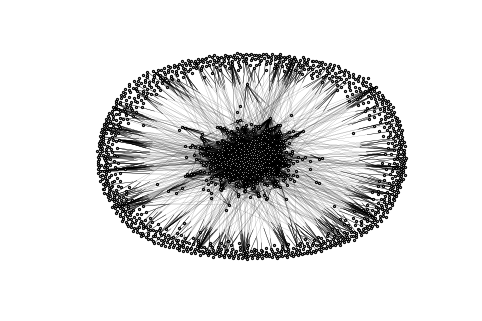

In [23]:
nx.draw(PG, node_size = 5, node_color = '#939393', width=0.1)
plt.savefig("graph.pdf")
plt.show()



#nx.draw(G,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=True)
#plt.show()
#plt.savefig("graph.png", dpi=500, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1)

In [24]:
#in degree
inDegreeList = PG.in_degree()
sorted_inDegreeList = sorted(inDegreeList.items(), key=operator.itemgetter(1), reverse=True)
#print sorted_inDegreeList

#out degree
outDegreeList = PG.out_degree()
sorted_outDegreeList = sorted(outDegreeList.items(), key=operator.itemgetter(1), reverse=True)
#print sorted_outDegreeList


print "Top 10 terms by in-degree:"
for i in range(20):
    print sorted_inDegreeList[i][1], " ", sorted_inDegreeList[i][0]
    
print "Top 10 terms by out-degree:"
for i in range(20):
    print sorted_outDegreeList[i][1], " ",sorted_outDegreeList[i][0]

Top 10 terms by in-degree:
78   voltage
77   energy
74   force
72   physics
71   engineering
71   electron
70   frequency
66   capacitor
64   magnetic field
59   mass
59   electronics
59   pressure
57   temperature
55   alternating current
54   transistor
54   electric field
50   fluid
49   resistor
49   velocity
48   transformer
Top 10 terms by out-degree:
58   electrical engineering
57   electricity
54   capacitor
51   force
50   mechanical engineering
47   amplifier
45   classical mechanics
43   diode
40   physics
39   spacecraft propulsion
38   negative resistance
36   vacuum tube
35   electron
33   light-emitting diode
32   relaxation oscillator
32   engineering
32   rocket
31   inductor
30   machine
30   electromagnetism


In [25]:
#
#
#
#
#
#
#
#
#To be done:
# functions, stemming, unicode, 
# write about findings from the code. 

In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stopwords = nltk.corpus.stopwords.words('english')

In [27]:
all_article_names = all_terms_list



articles_text = {}
each_article_set ={}
tf = {}
list_all_words = []


unique_words = set()
for term in all_terms_list:
    each_article_set[term]=set()
    temp_set = set()
    try:
        term_string = io.open('terms/'+term, 'r', encoding='utf-8')
    except:
        continue
    #TOKENIZE IT (revieve this to make improvements)
    temp_text = term_string.read()
    #temp_text = re.sub(r'[^\w-]+',' ',temp_text)
    temp_text = re.sub(r'([^\w-]+|\_+|\d+|\_k|\bname\b|\bsub\b|\bu2013\b|\bmathbf\b|\bmath\b|\bref\b|\btitle\b|\bcite\b|\btextbf\b)',' ',temp_text)
    temp_tokens = nltk.word_tokenize(temp_text)
    #make all words to lower
    temp_tokens = [item.lower() for item in temp_tokens if item.lower() not in stopwords]
    articles_text[term] = temp_tokens
    
    tf[term] = Counter(articles_text[term])
    
    for w in articles_text[term]:
        each_article_set[term].add(w)
        temp_set.add(w)
        unique_words.add(w)
    list_all_words.extend(temp_set)


In [28]:
all_text = {}
articles_in_branches = scienceTypes
branchNames = ['electronic_list', "electrical_list", "computer_science_list", 
                     "robotics_list", "mechanics_list", "aerospace_list"]

for i in range(len(branchNames)):
    all_text[branchNames[i]]=[]
    for term in articles_in_branches[i]: 
        try:
            term_string = io.open('terms/'+term, 'r', encoding='utf-8')
        except:
            continue
        #TOKENIZE IT (revieve this to make improvements)
        temp_text = term_string.read()
        temp_text = re.sub(r'([^\w-]+|\_+|\d+|\_k|\bname\b|\bsub\b|\bu2013\b|\bmathbf\b|\bmath\b|\bref\b|\btitle\b|\bcite\b|\btextbf\b)',' ',temp_text)
        temp_tokens = nltk.word_tokenize(temp_text)
        #make all words to lower
        temp_tokens = [item.lower() for item in temp_tokens if item.lower() not in stopwords]
        
        all_text[branchNames[i]].extend(temp_tokens)

In [29]:
for i in branchNames:
    print len(all_text[i])

848033
444359
420260
186647
669211
574950


In [30]:
branch_tf = {}
idf = {}

for i in branchNames:
    branch_tf[i]=Counter(all_text[i])
#we calculate idf by taking the log of the number of total articles divided by how many articles that word is in
word_article_freq =  Counter(list_all_words)
for w in unique_words:
    idf[w] = np.log(len(all_terms_list)/word_article_freq[w])

In [31]:
#we can now calculate all the tfidf vectors
tfidf_branches = {}
for a in branchNames:
    #we name each vector by the article
    tfidf_branches[a]={}
    #since all the vector values of 0 doesnt change the vector calculations we only add the word values for words that
    #are actually in the text, that way we save computation time by not having 100000s of 0's
    for w in all_text[a]:
        #calculate tf-idf for the given word
        tfidf_branches[a][w] = branch_tf[a][w]*idf[w]

In [32]:
#calculates TFIDF for individual articles rather than branches

#tfidf_articles = {}
#for a in all_terms_list:
#    tfidf_articles[a]={}
#    for w in each_article_set[a]:
#        tfidf_articles[a][w] = tf[a][w]*idf[w]

In [33]:
cloudList = {}
for i in branchNames:
    cloudList[i]=[]
    for w in tfidf_branches[i]:
        for t in range(int(tfidf_branches[i][w])):
            cloudList[i].append(w)

In [34]:
#word sorting (this has been moved up and done with language processing)
#listCloud = {}
#for i in branchNames:
#    listCloud[i] = [x for x in cloudList[i] if x != 'ref' if x != 'title' if x != 'cite'
#                    if x != 'sub' if x != 'name' if x != 'math' if x != 'mathbf' if x != 'u2013']

In [35]:
word_clouds = {}
for i in branchNames:
    word_clouds[i] = ''.join(str(x)+' ' for x in cloudList[i])
#computer_science_cloud = ''.join(str(x)+' ' for x in cloudList['computer_science_list'])
#electronic_cloud  = ''.join(str(x)+' ' for x in cloudList['electronic_list'])
#electrical_cloud  = ''.join(str(x)+' ' for x in cloudList["electrical_list"])
#robotics_cloud  = ''.join(str(x)+' ' for x in cloudList[ "robotics_list"])
#mechanics_cloud  = ''.join(str(x)+' ' for x in cloudList["mechanics_list"])
#aerospace_cloud  = ''.join(str(x)+' ' for x in cloudList["aerospace_list"])


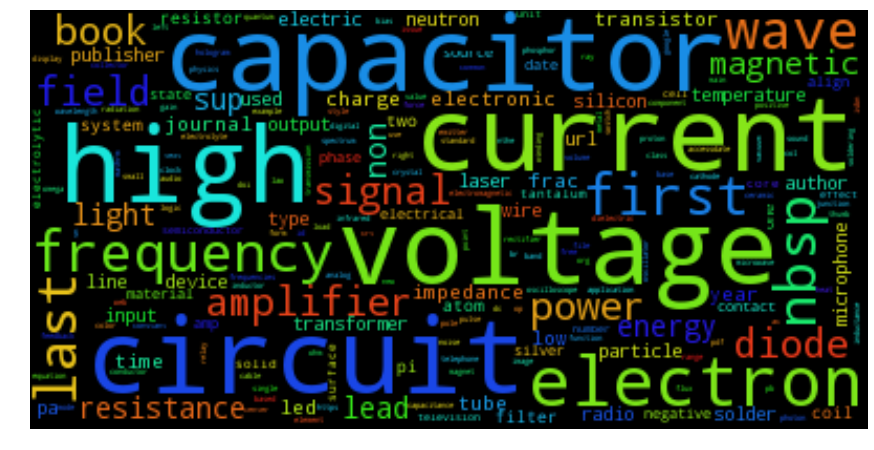

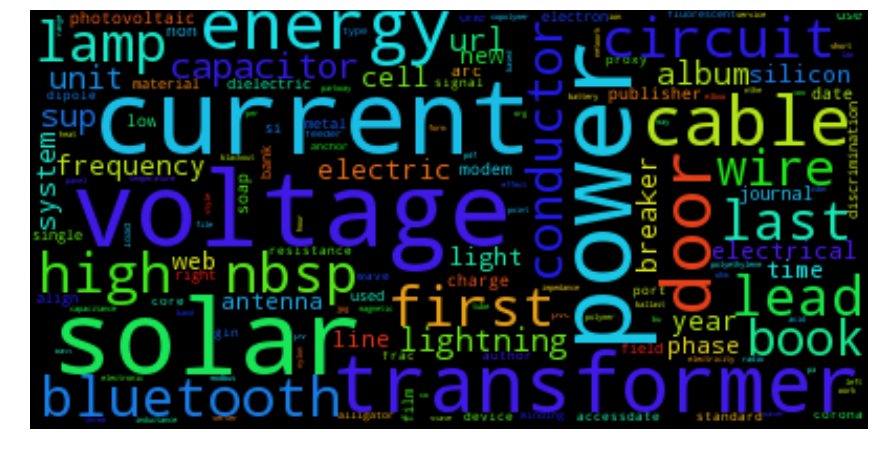

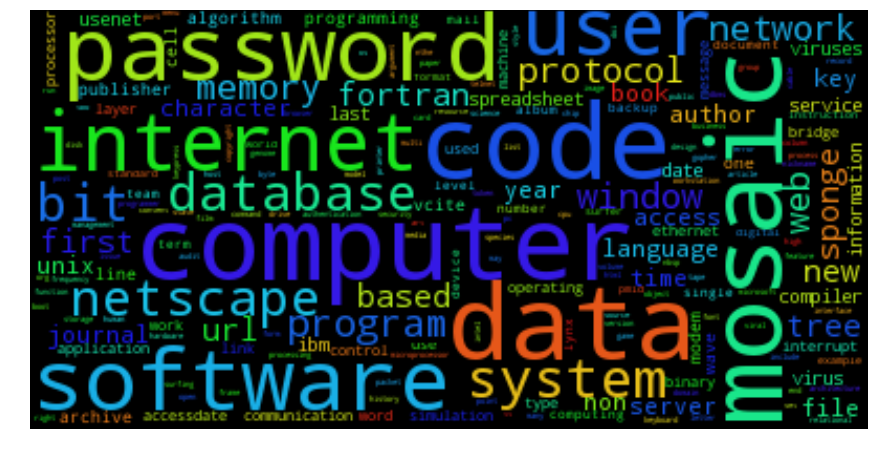

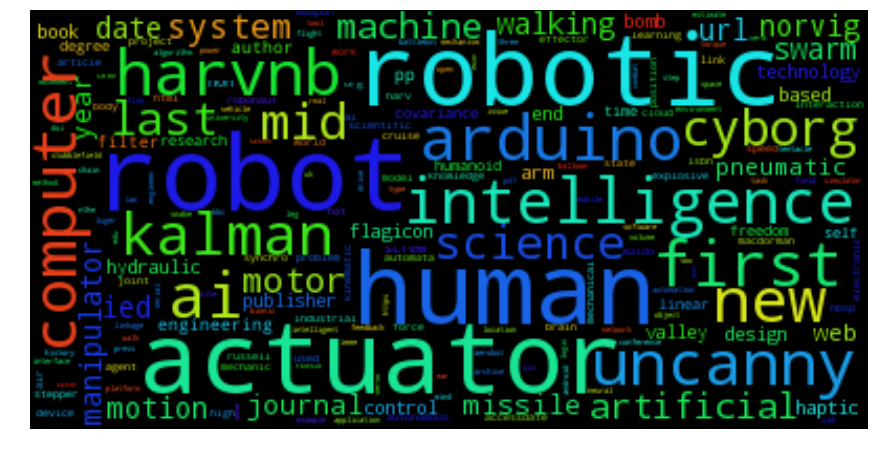

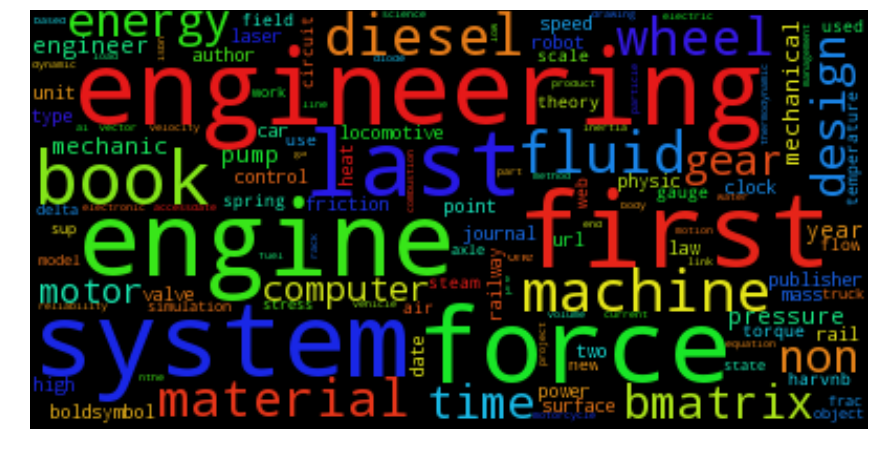

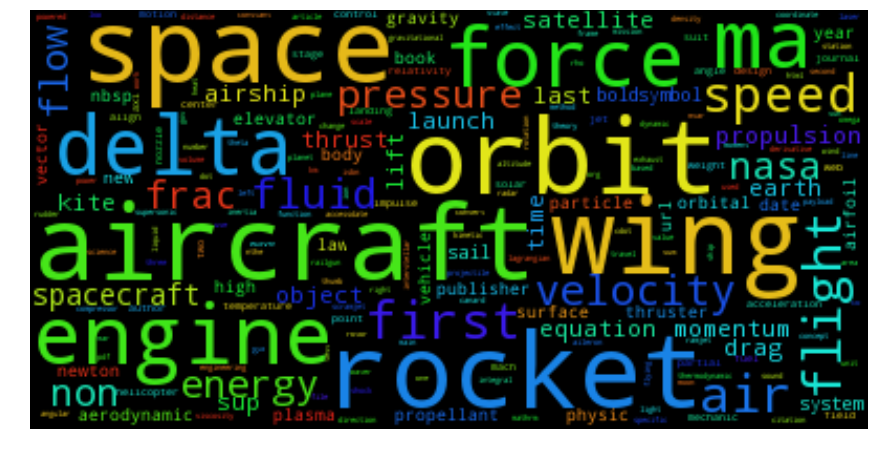

In [36]:
for b in branchNames:
    wordcloud = WordCloud(max_font_size=50).generate(word_clouds[b])
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")

In [37]:
#Calculate cosine similarity between a user input (text) and the branches to see which branch the input is most similar with

In [38]:
textInput = 'User text input.txt'

input_tf = {}
input_tfidf={}

userInput = io.open(textInput, 'r', encoding='ISO-8859-1')
userInput = userInput.read()
userInput = re.sub(r'([^\w-]+)',' ',userInput)
userInput = nltk.word_tokenize(userInput)
#make all words to lower
userInput = [item.lower() for item in userInput if item.lower() not in stopwords]
input_tf = Counter(userInput)
input_tf_present = [x for x in input_tf if x in unique_words]
for w in input_tf_present:
    input_tfidf[w] = input_tf[w]*idf[w]

In [39]:
#functions used for calculations with the vectors
#find the length of the vector
def vector_sum(vector):
    vsum=0.0
    for v in vector:
        vsum+=vector[v]**2
    vsum = np.sqrt(vsum)
    return vsum
#calculate the dot product between two vectors
def dot_product(a,b):
    if len(a.keys())>len(b.keys()):
        v1 = a
        v2 = b
    else:
        v1 = b
        v2 = a
    vsum=0.0
    for k in v1:
        try:
            vsum+=v1[k]*v2[k]
        except KeyError:
            vsum+=0
    return vsum
#calculate cosine similarity of two vectors
def cosine_similarity(a,b):
    return dot_product(a,b)/(vector_sum(a)*vector_sum(b))

In [40]:
for branch in branchNames:
    print branch, cosine_similarity(tfidf_branches[branch],input_tfidf)

electronic_list 0.0650096519725
electrical_list 0.0674250852529
computer_science_list 0.0889250027926
robotics_list 0.0869375227399
mechanics_list 0.0856851588645
aerospace_list 0.0670920507695
